## Observations and Insights

1) When we compare the four regimens of interest (Capomulin, Ramicane, Infubinol, and Ceftamin), we see that Capomulin and Ramicane generates lower tumor volume response compared to that of Infubinol and Ceftamin. This is reinforced by the box plot of the final tumor volume of each mouse across the four regimens - Capomulin and Ramicane have shorter boxes and hence less variability in their dataset. 

2) Based on the oberservation of one mouse (s185), we can see that Capomulin treatment reduces tumor volume over the course of time. 

3) There is strong, positive correlation between the weight and average tumor volume of mice, as indicated by the correlation coefficient and scatter plot.

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merge_df["Drug Regimen"].value_counts()

capomulin_df = merge_df.loc[merge_df["Drug Regimen"]== "Capomulin"]
capomulin_TV = pd.DataFrame(capomulin_df["Tumor Volume (mm3)"])

capomulin_mean = capomulin_TV.mean()
capomulin_med = capomulin_TV.median()
capomulin_var = capomulin_TV.var()
capomulin_std = capomulin_TV.std()
capomulin_sem = capomulin_TV.sem()

capomulin_mean = capomulin_mean[0]
capomulin_med = capomulin_med[0]
capomulin_var = capomulin_var[0]
capomulin_std = capomulin_std[0]
capomulin_sem = capomulin_sem[0]

capomulin_summary = pd.DataFrame (
    {"": ["Mean", "Median", "Variance", "Standard Deviation", "Sem"],
     "Capomulin - Tumor Volume (mm3)" : [capomulin_mean, capomulin_med, capomulin_var, capomulin_std, capomulin_sem]
    }
)
capomulin_summary

,,Capomulin - Tumor Volume (mm3)
0,Mean,40.675741
1,Median,41.557809
2,Variance,24.947764
3,Standard Deviation,4.994774
4,Sem,0.329346


In [4]:
ramicane_df = merge_df.loc[merge_df["Drug Regimen"]== "Ramicane"]
ramicane_TV = pd.DataFrame(ramicane_df["Tumor Volume (mm3)"])

ramicane_mean = ramicane_TV.mean()
ramicane_med = ramicane_TV.median()
ramicane_var = ramicane_TV.var()
ramicane_std = ramicane_TV.std()
ramicane_sem = ramicane_TV.sem()

ramicane_mean = ramicane_mean[0]
ramicane_med = ramicane_med[0]
ramicane_var = ramicane_var[0]
ramicane_std = ramicane_std[0]
ramicane_sem = ramicane_sem[0]

ramicane_summary = pd.DataFrame (
    {"": ["Mean", "Median", "Variance", "Standard Deviation", "Sem"],
     "Ramicane - Tumor Volume (mm3)" : [ramicane_mean, ramicane_med, ramicane_var, ramicane_std, ramicane_sem]
    }
)
ramicane_summary

,,Ramicane - Tumor Volume (mm3)
0,Mean,40.216745
1,Median,40.673236
2,Variance,23.486704
3,Standard Deviation,4.846308
4,Sem,0.320955


In [5]:
ketapril_df = merge_df.loc[merge_df["Drug Regimen"]== "Ketapril"]
ketapril_TV = pd.DataFrame(ketapril_df["Tumor Volume (mm3)"])

ketapril_mean = ketapril_TV.mean()
ketapril_med = ketapril_TV.median()
ketapril_var = ketapril_TV.var()
ketapril_std = ketapril_TV.std()
ketapril_sem = ketapril_TV.sem()

ketapril_mean = ketapril_mean[0]
ketapril_med = ketapril_med[0]
ketapril_var = ketapril_var[0]
ketapril_std = ketapril_std[0]
ketapril_sem = ketapril_sem[0]

ketapril_summary = pd.DataFrame (
    {"": ["Mean", "Median", "Variance", "Standard Deviation", "Sem"],
     "Ketapril - Tumor Volume (mm3)" : [ketapril_mean, ketapril_med, ketapril_var, ketapril_std, ketapril_sem]
    }
)
ketapril_summary

,,Ketapril - Tumor Volume (mm3)
0,Mean,55.235638
1,Median,53.698743
2,Variance,68.553577
3,Standard Deviation,8.279709
4,Sem,0.603860


In [6]:
naftisol_df = merge_df.loc[merge_df["Drug Regimen"]== "Naftisol"]
naftisol_TV = pd.DataFrame(naftisol_df["Tumor Volume (mm3)"])

naftisol_mean = naftisol_TV.mean()
naftisol_med = naftisol_TV.median()
naftisol_var = naftisol_TV.var()
naftisol_std = naftisol_TV.std()
naftisol_sem = naftisol_TV.sem()

naftisol_mean = naftisol_mean[0]
naftisol_med = naftisol_med[0]
naftisol_var = naftisol_var[0]
naftisol_std = naftisol_std[0]
naftisol_sem = naftisol_sem[0]

naftisol_summary = pd.DataFrame (
    {"": ["Mean", "Median", "Variance", "Standard Deviation", "Sem"],
     "Naftisol - Tumor Volume (mm3)" : [naftisol_mean, naftisol_med, naftisol_var, naftisol_std, naftisol_sem]
    }
)
naftisol_summary

,,Naftisol - Tumor Volume (mm3)
0,Mean,54.331565
1,Median,52.509285
2,Variance,66.173479
3,Standard Deviation,8.134708
4,Sem,0.596466


In [7]:
zoniferol_df = merge_df.loc[merge_df["Drug Regimen"]== "Zoniferol"]
zoniferol_TV = pd.DataFrame(zoniferol_df["Tumor Volume (mm3)"])

zoniferol_mean = zoniferol_TV.mean()
zoniferol_med = zoniferol_TV.median()
zoniferol_var = zoniferol_TV.var()
zoniferol_std = zoniferol_TV.std()
zoniferol_sem = zoniferol_TV.sem()

zoniferol_mean = zoniferol_mean[0]
zoniferol_med = zoniferol_med[0]
zoniferol_var = zoniferol_var[0]
zoniferol_std = zoniferol_std[0]
zoniferol_sem = zoniferol_sem[0]

zoniferol_summary = pd.DataFrame (
    {"": ["Mean", "Median", "Variance", "Standard Deviation", "Sem"],
     "Zoniferol - Tumor Volume (mm3)" : [zoniferol_mean, zoniferol_med, zoniferol_var, zoniferol_std, zoniferol_sem]
    }
)
zoniferol_summary

,,Zoniferol - Tumor Volume (mm3)
0,Mean,53.236507
1,Median,51.818479
2,Variance,48.533355
3,Standard Deviation,6.966589
4,Sem,0.516398


In [8]:
stelasyn_df = merge_df.loc[merge_df["Drug Regimen"]== "Stelasyn"]
stelasyn_TV = pd.DataFrame(stelasyn_df["Tumor Volume (mm3)"])

stelasyn_mean = stelasyn_TV.mean()
stelasyn_med = stelasyn_TV.median()
stelasyn_var = stelasyn_TV.var()
stelasyn_std = stelasyn_TV.std()
stelasyn_sem = stelasyn_TV.sem()

stelasyn_mean = stelasyn_mean[0]
stelasyn_med = stelasyn_med[0]
stelasyn_var = stelasyn_var[0]
stelasyn_std = stelasyn_std[0]
stelasyn_sem = stelasyn_sem[0]

stelasyn_summary = pd.DataFrame (
    {"": ["Mean", "Median", "Variance", "Standard Deviation", "Sem"],
     "Stelasyn - Tumor Volume (mm3)" : [stelasyn_mean, stelasyn_med, stelasyn_var, stelasyn_std, stelasyn_sem]
    }
)
stelasyn_summary

,,Stelasyn - Tumor Volume (mm3)
0,Mean,54.233149
1,Median,52.431737
2,Variance,59.450562
3,Standard Deviation,7.710419
4,Sem,0.573111


In [9]:
placebo_df = merge_df.loc[merge_df["Drug Regimen"]== "Placebo"]
placebo_TV = pd.DataFrame(placebo_df["Tumor Volume (mm3)"])

placebo_mean = placebo_TV.mean()
placebo_med = placebo_TV.median()
placebo_var = placebo_TV.var()
placebo_std = placebo_TV.std()
placebo_sem = placebo_TV.sem()

placebo_mean = placebo_mean[0]
placebo_med = placebo_med[0]
placebo_var = placebo_var[0]
placebo_std = placebo_std[0]
placebo_sem = placebo_sem[0]

placebo_summary = pd.DataFrame (
    {"": ["Mean", "Median", "Variance", "Standard Deviation", "Sem"],
     "Placebo - Tumor Volume (mm3)" : [placebo_mean, placebo_med, placebo_var, placebo_std, placebo_sem]
    }
)
placebo_summary

,,Placebo - Tumor Volume (mm3)
0,Mean,54.033581
1,Median,52.288934
2,Variance,61.168083
3,Standard Deviation,7.821003
4,Sem,0.581331


In [10]:
infubinol_df = merge_df.loc[merge_df["Drug Regimen"]== "Infubinol"]
infubinol_TV = pd.DataFrame(infubinol_df["Tumor Volume (mm3)"])

infubinol_mean = infubinol_TV.mean()
infubinol_med = infubinol_TV.median()
infubinol_var = infubinol_TV.var()
infubinol_std = infubinol_TV.std()
infubinol_sem = infubinol_TV.sem()

infubinol_mean = infubinol_mean[0]
infubinol_med = infubinol_med[0]
infubinol_var = infubinol_var[0]
infubinol_std = infubinol_std[0]
infubinol_sem = infubinol_sem[0]

infubinol_summary = pd.DataFrame (
    {"": ["Mean", "Median", "Variance", "Standard Deviation", "Sem"],
     "Infubinol - Tumor Volume (mm3)" : [infubinol_mean, infubinol_med, infubinol_var, infubinol_std, infubinol_sem]
    }
)
infubinol_summary

,,Infubinol - Tumor Volume (mm3)
0,Mean,52.884795
1,Median,51.820584
2,Variance,43.128684
3,Standard Deviation,6.567243
4,Sem,0.492236


In [11]:
ceftamin_df = merge_df.loc[merge_df["Drug Regimen"]== "Ceftamin"]
ceftamin_TV = pd.DataFrame(ceftamin_df["Tumor Volume (mm3)"])

ceftamin_mean = ceftamin_TV.mean()
ceftamin_med = ceftamin_TV.median()
ceftamin_var = ceftamin_TV.var()
ceftamin_std = ceftamin_TV.std()
ceftamin_sem = ceftamin_TV.sem()

ceftamin_mean = ceftamin_mean[0]
ceftamin_med = ceftamin_med[0]
ceftamin_var = ceftamin_var[0]
ceftamin_std = ceftamin_std[0]
ceftamin_sem = ceftamin_sem[0]

ceftamin_summary = pd.DataFrame (
    {"": ["Mean", "Median", "Variance", "Standard Deviation", "Sem"],
     "Ceftamin - Tumor Volume (mm3)" : [ceftamin_mean, ceftamin_med, ceftamin_var, ceftamin_std, ceftamin_sem]
    }
)
ceftamin_summary

,,Ceftamin - Tumor Volume (mm3)
0,Mean,52.591172
1,Median,51.776157
2,Variance,39.290177
3,Standard Deviation,6.268188
4,Sem,0.469821


In [12]:
propriva_df = merge_df.loc[merge_df["Drug Regimen"]== "Propriva"]
propriva_TV = pd.DataFrame(propriva_df["Tumor Volume (mm3)"])

propriva_mean = propriva_TV.mean()
propriva_med = propriva_TV.median()
propriva_var = propriva_TV.var()
propriva_std = propriva_TV.std()
propriva_sem = propriva_TV.sem()

propriva_mean = propriva_mean[0]
propriva_med = propriva_med[0]
propriva_var = propriva_var[0]
propriva_std = propriva_std[0]
propriva_sem = propriva_sem[0]

propriva_summary = pd.DataFrame (
    {"": ["Mean", "Median", "Variance", "Standard Deviation", "Sem"],
     "Propriva - Tumor Volume (mm3)" : [propriva_mean, propriva_med, propriva_var, propriva_std, propriva_sem]
    }
)
propriva_summary

,,Propriva - Tumor Volume (mm3)
0,Mean,52.322552
1,Median,50.854632
2,Variance,42.351070
3,Standard Deviation,6.507770
4,Sem,0.512884


## Bar plots

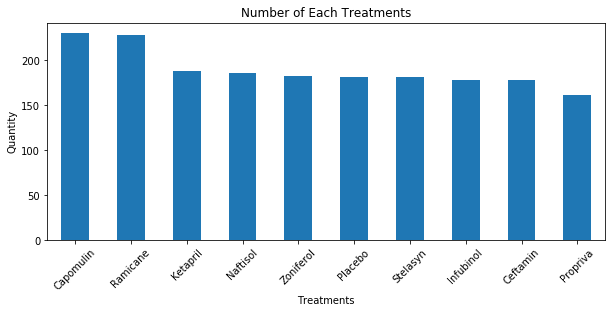

In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
merge_df["Drug Regimen"].value_counts()
drug_regimen = merge_df["Drug Regimen"].value_counts()

#plt.figure(figsize=(10,4))
drug_regimen.plot(kind = "bar", figsize=(10,4))
plt.title("Number of Each Treatments")
plt.xlabel("Treatments")
plt.ylabel("Quantity")
plt.xticks(rotation= "45")
plt.show()


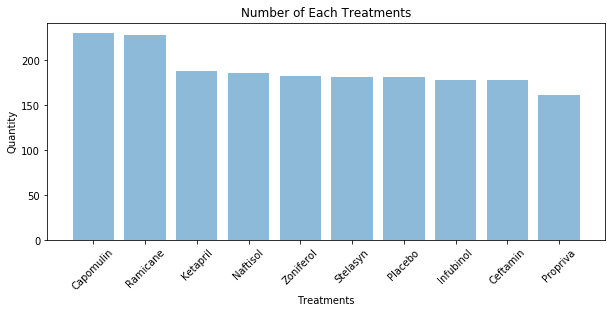

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
merge_df["Drug Regimen"].value_counts()

drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]

drug_regimen = merge_df["Drug Regimen"].value_counts()
drug_regimen_numbers = list(drug_regimen)

plt.figure(figsize=(10,4))
plt.bar(drugs, drug_regimen_numbers, alpha = 0.5, align = "center")
plt.title("Number of Each Treatments")
plt.xlabel("Treatments")
plt.ylabel("Quantity")
plt.xticks(rotation= "45")
plt.show()

## Pie plots

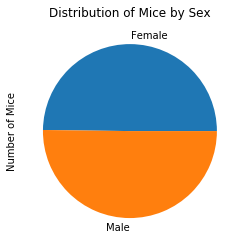

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
merge_df

grouped_sex = merge_df.groupby(["Sex"])
sex_count = grouped_sex["Mouse ID"].nunique()
sex_count

sex_count.plot(kind = "pie")
plt.title("Distribution of Mice by Sex")
plt.ylabel("Number of Mice")
plt.show()

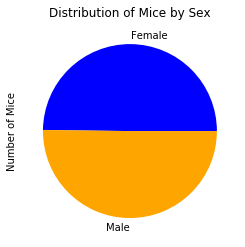

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count
labels = ["Female", "Male"]
sizes = [124, 125]
colors = ["blue", "orange"]

plt.pie(sizes, labels = labels, colors = colors)
plt.title("Distribution of Mice by Sex")
plt.ylabel("Number of Mice")
plt.show()

## Quartiles, outliers and boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
merge_df

capomulin_df = merge_df.loc[merge_df["Drug Regimen"]=="Capomulin", :]
capomulin_df.head()
grouped_capomulin = capomulin_df.groupby(["Mouse ID"])
grouped_capomulin["Tumor Volume (mm3)"].sum()

capomulin = list(grouped_capomulin["Tumor Volume (mm3)"].sum())
capomulin.sort()

capomulin_q1 = np.percentile(capomulin, 25, interpolation = 'midpoint')
capomulin_med = np.median(capomulin)
capomulin_q3 = np.percentile(capomulin, 75, interpolation = 'midpoint')
capomulin_IQR = capomulin_q3 - capomulin_q1

print("CAPOMULIN:" "\n")
print(f"Capomulin: {capomulin}" "\n")
print(f"First quartile: {capomulin_q1}")
print(f"Median: {capomulin_med}")
print(f"Third quartile: {capomulin_q3}")
print(f"IQR: {capomulin_IQR}" "\n")

capomulin_lower = capomulin_q1 - (1.5*capomulin_IQR)
print(f"Lower bound: {capomulin_lower}")
capomulin_upper = capomulin_q3 + (1.5*capomulin_IQR)
print(f"Upper bound: {capomulin_upper}")

CAPOMULIN:

Capomulin: [124.15447563, 182.5298638, 183.19587803000002, 345.59143395, 345.73539687, 348.47469897, 361.82039562, 365.09212046000005, 385.06829248, 390.49816448, 391.4105275, 393.28725099, 398.87495191, 400.83699304, 413.52452280999995, 415.81595100999994, 419.63635634, 419.90096606, 425.07261035000005, 428.0373304399999, 433.67364452999993, 444.3447379, 444.65236345, 446.13343896000003, 448.0580968499999]

First quartile: 361.82039562
Median: 398.87495191
Third quartile: 425.07261035000005
IQR: 63.25221473000005

Lower bound: 266.94207352499996
Upper bound: 519.9509324450001


In [18]:
ramicane_df = merge_df.loc[merge_df["Drug Regimen"]=="Ramicane", :]
ramicane_df.head()
grouped_ramicane = ramicane_df.groupby(["Mouse ID"])
grouped_ramicane["Tumor Volume (mm3)"].sum()

ramicane = list(grouped_ramicane["Tumor Volume (mm3)"].sum())
ramicane.sort()

ramicane_q1 = np.percentile(ramicane, 25, interpolation = 'midpoint')
ramicane_med = np.median(ramicane)
ramicane_q3 = np.percentile(ramicane, 75, interpolation = 'midpoint')
ramicane_IQR = ramicane_q3 - ramicane_q1

print("RAMICANE:" "\n")
print(f"Ramicane: {ramicane}" "\n")
print(f"First quartile: {ramicane_q1}")
print(f"Median: {ramicane_med}")
print(f"Third quartile: {ramicane_q3}")
print(f"IQR: {ramicane_IQR}" "\n")

ramicane_lower = ramicane_q1 - (1.5*ramicane_IQR)
print(f"Lower bound: {ramicane_lower}")
ramicane_upper = ramicane_q3 + (1.5*ramicane_IQR)
print(f"Upper bound: {ramicane_upper}")

RAMICANE:

Ramicane: [88.16637266000001, 181.43908834, 295.88437385, 307.01843584999995, 323.58858914, 345.47188499, 360.50156185, 372.87651184000003, 374.89236629000004, 378.8287777, 379.89218655999997, 384.11510008, 388.07794580999996, 391.28332654999997, 396.40442954, 396.47958076000003, 400.3384029, 401.0857753000001, 407.0138542699999, 412.28577471, 418.68769118, 430.6005243799999, 436.04010381, 442.6812687800001, 455.76394806999997]

First quartile: 360.50156185
Median: 388.07794580999996
Third quartile: 407.0138542699999
IQR: 46.51229241999994

Lower bound: 290.73312322000004
Upper bound: 476.7822928999998


In [19]:
infubinol_df = merge_df.loc[merge_df["Drug Regimen"]=="Infubinol", :]
infubinol_df.head()
grouped_infubinol = infubinol_df.groupby(["Mouse ID"])
grouped_infubinol["Tumor Volume (mm3)"].sum()

infubinol = list(grouped_infubinol["Tumor Volume (mm3)"].sum())
infubinol.sort()

infubinol_q1 = np.percentile(infubinol, 25, interpolation = 'midpoint')
infubinol_med = np.median(infubinol)
infubinol_q3 = np.percentile(infubinol, 75, interpolation = 'midpoint')
infubinol_IQR = infubinol_q3 - infubinol_q1

print("INFUBINOL:" "\n")
print(f"Infubinol: {infubinol}" "\n")
print(f"First quartile: {infubinol_q1}")
print(f"Median: {infubinol_med}")
print(f"Third quartile: {infubinol_q3}")
print(f"IQR: {infubinol_IQR}" "\n")

infubinol_lower = infubinol_q1 - (1.5*infubinol_IQR)
print(f"Lower bound: {infubinol_lower}")
infubinol_upper = infubinol_q3 + (1.5*infubinol_IQR)
print(f"Upper bound: {infubinol_upper}")

INFUBINOL:

Infubinol: [81.32134579999999, 90.69933087999999, 91.25011212, 92.01036401, 195.05679137, 238.23112028000003, 250.34313264000002, 298.16480406, 348.17605384999996, 355.4003434, 356.85866622, 365.38676796, 368.77146924, 403.34820421, 424.73228748, 496.57607545999997, 518.97959235, 530.1146736000001, 539.7958369400001, 550.2654276, 552.37094603, 557.1168793400001, 557.98679797, 563.12707705, 587.40942947]

First quartile: 250.34313264000002
Median: 368.77146924
Third quartile: 539.7958369400001
IQR: 289.45270430000005

Lower bound: -183.83592381000005
Upper bound: 973.9748933900001


In [20]:
ceftamin_df = merge_df.loc[merge_df["Drug Regimen"]=="Ceftamin", :]
ceftamin_df.head()
grouped_ceftamin = ceftamin_df.groupby(["Mouse ID"])
grouped_ceftamin["Tumor Volume (mm3)"].sum()

ceftamin = list(grouped_ceftamin["Tumor Volume (mm3)"].sum())
ceftamin.sort()

ceftamin_q1 = np.percentile(ceftamin, 25, interpolation = 'midpoint')
ceftamin_med = np.median(ceftamin)
ceftamin_q3 = np.percentile(ceftamin, 75, interpolation = 'midpoint')
ceftamin_IQR = ceftamin_q3 - ceftamin_q1

print("CEFTAMIN:" "\n")
print(f"Ceftamin: {ceftamin}" "\n")
print(f"First quartile: {ceftamin_q1}")
print(f"Median: {ceftamin_med}")
print(f"Third quartile: {ceftamin_q3}")
print(f"IQR: {ceftamin_IQR}" "\n")

ceftamin_lower = ceftamin_q1 - (1.5*ceftamin_IQR)
print(f"Lower bound: {ceftamin_lower}")
ceftamin_upper = ceftamin_q3 + (1.5*ceftamin_IQR)
print(f"Upper bound: {ceftamin_upper}")

CEFTAMIN:

Ceftamin: [45.0, 45.0, 45.0, 45.0, 92.78468179999999, 137.59362373, 188.23985302, 290.02268209, 300.04703288, 354.0308197, 358.9998406, 469.15237295, 516.11146932, 527.70965092, 528.4897958299999, 528.5589626, 530.5355342600001, 532.63939784, 534.67355232, 536.64383127, 538.2422593900001, 545.00982323, 549.98558612, 558.84893972, 562.90887252]

First quartile: 188.23985302
Median: 516.11146932
Third quartile: 534.67355232
IQR: 346.4336993

Lower bound: -331.41069593000003
Upper bound: 1054.32410127


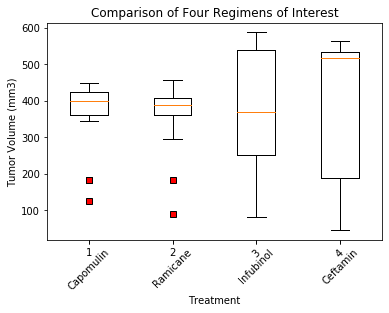

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin = list(grouped_capomulin["Tumor Volume (mm3)"].sum())

ramicane = list(grouped_ramicane["Tumor Volume (mm3)"].sum())

infubinol = list(grouped_infubinol["Tumor Volume (mm3)"].sum())

ceftamin = list(grouped_ceftamin["Tumor Volume (mm3)"].sum())

regimens_data = [capomulin, ramicane, infubinol, ceftamin]

red_square = dict(markerfacecolor = 'r', marker = 's')
fig, ax1 = plt.subplots()
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], rotation = 45)
ax1.boxplot(regimens_data)
ax1.boxplot(regimens_data, flierprops=red_square)

plt.title("Comparison of Four Regimens of Interest")
plt.xlabel("Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and scatter plots

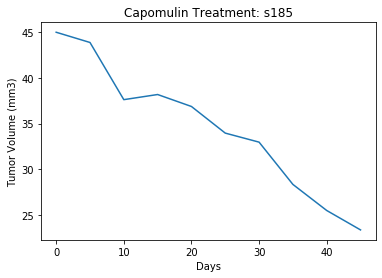

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = merge_df.loc[merge_df["Drug Regimen"]=="Capomulin", :]
capomulin_df.head(20)

s185_df = capomulin_df.loc[capomulin_df["Mouse ID"]== "s185"]
s185_timepoint = list(s185_df["Timepoint"])
s185_tumor_vol = list(s185_df["Tumor Volume (mm3)"])

plt.plot(s185_timepoint, s185_tumor_vol)

plt.title("Capomulin Treatment: s185")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

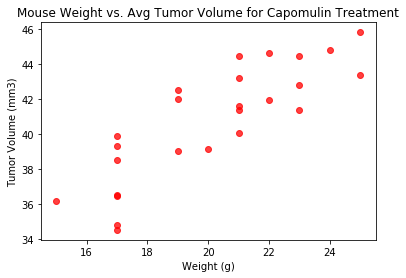

In [55]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = merge_df.loc[merge_df["Drug Regimen"]=="Capomulin", :]
capomulin_df.head(20)

grouped_mouse = capomulin_df.groupby(["Mouse ID"])
grouped_mouse_comparison = grouped_mouse.mean()
grouped_mouse_comparison

capomulin_weight = list(grouped_mouse_comparison["Weight (g)"])
avg_capomulin_TV = list(grouped_mouse_comparison["Tumor Volume (mm3)"])

x_values = capomulin_weight
y_values = avg_capomulin_TV

plt.scatter(x_values, y_values, marker="o", facecolors = "red", alpha = 0.75)
plt.title("Mouse Weight vs. Avg Tumor Volume for Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Correlation coefficient: 0.84


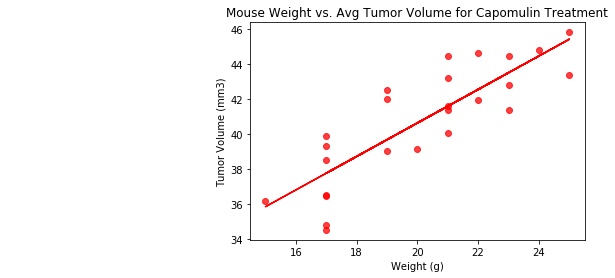

In [56]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
capomulin_weight
avg_capomulin_TV
correlation = st.pearsonr(capomulin_weight, avg_capomulin_TV)
round(correlation[0], 2)
print(f"Correlation coefficient: {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_weight, avg_capomulin_TV)
regress_values = np.asarray(capomulin_weight) * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker="o", facecolors = "red", alpha = 0.75)
plt.title("Mouse Weight vs. Avg Tumor Volume for Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6.5,40), fontsize = 10, color = "black")

plt.show()